<a href="https://colab.research.google.com/github/Prajjwal009/ExpenseTracker/blob/main/LSTM_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

In [1]:
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [4]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 6.4 MB 29.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
import yfinance as yf
import pandas as pd


In [41]:
df = yf.download('RELIANCE.NS')

[*********************100%***********************]  1 of 1 completed


In [42]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,15.859429,15.944529,15.754989,15.917452,10.509538,48051995
1996-01-02,15.878770,15.956133,15.677626,15.793671,10.427809,77875009
1996-01-03,16.052837,16.783918,15.878770,15.913584,10.506984,96602936
1996-01-04,15.762726,15.813012,15.553845,15.766594,10.409934,100099436
1996-01-05,15.704703,15.704703,15.522900,15.658285,10.338422,76935930
...,...,...,...,...,...,...
2022-02-14,2340.250000,2354.949951,2313.000000,2338.550049,2338.550049,4947109
2022-02-15,2351.199951,2423.899902,2335.699951,2417.949951,2417.949951,5174646
2022-02-16,2430.000000,2433.000000,2395.949951,2412.949951,2412.949951,4796294


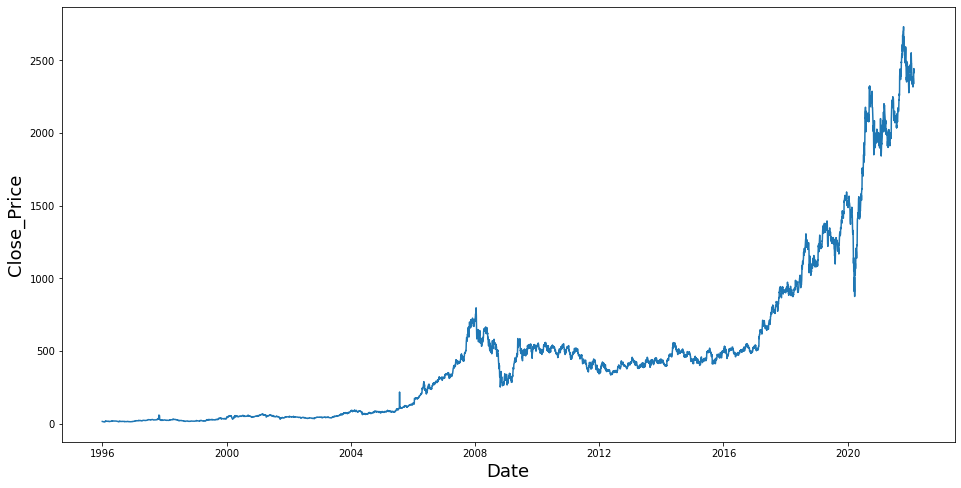

In [43]:
plt.figure(figsize = (16,8))

plt.plot(df["Close"])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.show()

In [44]:
data = df.filter(["Close"])
df = np.array(data).reshape(-1,1)
df


array([[  15.91745186],
       [  15.79367065],
       [  15.91358376],
       ...,
       [2412.94995117],
       [2443.5       ],
       [2424.39990234]])

In [45]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(np.array(df).reshape(-1,1))
scaled_df

array([[0.00148044],
       [0.00143494],
       [0.00147902],
       ...,
       [0.88275555],
       [0.89398735],
       [0.88696515]])

In [46]:
scaled_df
training_data_len = math.ceil(len(scaled_df)*0.8)
training_data_len

5261

In [47]:
train_data = scaled_df[0:training_data_len , :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00148044, 0.00143494, 0.00147902, 0.00142498, 0.00138516,
       0.00115477, 0.0009955 , 0.00085755, 0.00102109, 0.00096421,
       0.00090875, 0.0009187 , 0.00070822, 0.00056743, 0.00048068,
       0.00056317, 0.00035411, 0.00019199, 0.        , 0.        ,
       0.00034416, 0.00076795, 0.0006556 , 0.00085755, 0.00142498,
       0.00190709, 0.00138089, 0.00148755, 0.00199952, 0.00236928,
       0.00194691, 0.00232662, 0.00233088, 0.00222422, 0.00210761,
       0.00217302, 0.00182745, 0.00182745, 0.00215454, 0.00208485,
       0.00209907, 0.00202512, 0.00205641, 0.00165394, 0.00168808,
       0.0016255 , 0.0016255 , 0.00183882, 0.00189429, 0.00186158,
       0.00188149, 0.00220289, 0.00209054, 0.00208912, 0.00187722,
       0.00159279, 0.00122588, 0.00122588, 0.00162692, 0.00138374])]
[0.0013496074483449116]



In [48]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(5201, 60, 1)

In [49]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences = False))   
model.add(Dense(25))
model.add(Dense(1))

In [50]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size=40, epochs=10)

Epoch 1/10
131/131 [==============================] - 11s 55ms/step - loss: 5.3626e-04
Epoch 2/10
131/131 [==============================] - 7s 55ms/step - loss: 3.3498e-05
Epoch 3/10
131/131 [==============================] - 7s 55ms/step - loss: 3.5108e-05
Epoch 4/10
131/131 [==============================] - 8s 60ms/step - loss: 2.9894e-05
Epoch 5/10
131/131 [==============================] - 7s 55ms/step - loss: 4.3890e-05
Epoch 6/10
131/131 [==============================] - 7s 55ms/step - loss: 2.6883e-05
Epoch 7/10
131/131 [==============================] - 7s 55ms/step - loss: 2.4491e-05
Epoch 8/10
131/131 [==============================] - 7s 55ms/step - loss: 2.7345e-05
Epoch 9/10
131/131 [==============================] - 7s 55ms/step - loss: 2.3401e-05
Epoch 10/10
131/131 [==============================] - 7s 55ms/step - loss: 2.3530e-05


In [51]:
test_data = scaled_df[training_data_len - 60: , :]
x_test = []
y_test = df[training_data_len: , :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [52]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [53]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

71.6443632060584

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


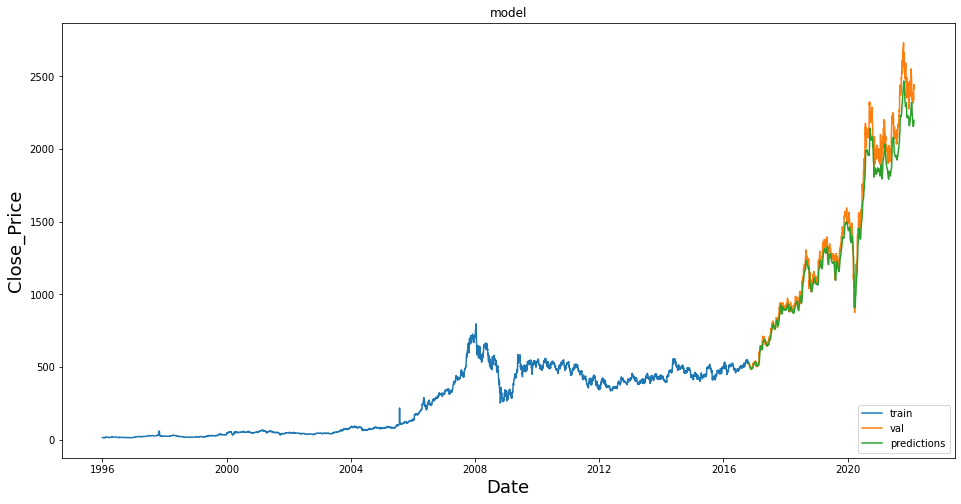

In [54]:
train = data[:training_data_len]
val = data[training_data_len:]
val['predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(val[['Close','predictions']],)
plt.legend(['train', 'val', 'predictions'], loc = 'lower right')
plt.show()